In [496]:
import sys
import time

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay
# import seaborn as sns
# sns.set()
from sklearn import tree
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PowerTransformer
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
import seaborn as sns
from fuzzytree import FuzzyDecisionTreeClassifier

In [349]:
filenames = {
    "emulab_hdd_merged": "emulab_d460_10Gbps_hdd_merged_V2.csv",
    "emulab_hdd_unmerged": "emulab_d460_10Gbps_hdd_unmerged_V2.csv",

    "utah_ssd_merged": "utah_c6525-25g_25Gbps_ssd_merged_V2.csv",
    "utah_ssd_unmerged": "utah_c6525-25g_25Gbps_ssd_unmerged_V2.csv",

    "wisconsin_ssd_merged": "wisconsin_c220g1-10Gbps_ssd_merged_V2.csv",
    "wisconsin_ssd_unmerged": "wisconsin_c220g1-10Gbps_ssd_unmerged_V2.csv",

    "utah_ssd_merged_1g": "utah_c6525-25g_1Gbps_ssd_merged_V2.csv",
    "utah_ssd_unmerged_1g": "utah_c6525-25g_1Gbps_ssd_unmerged_V2.csv",

    "wisconsin_hdd_ssd_merged": "wisconsin_c220g1-10Gbps_hdd_ssd_merged_V2.csv",
    "wisconsin_hdd-ssd_unmerged": "wisconsin_c220g1-10Gbps_hdd_ssd_unmerged_V2.csv",

    "utah_22_unmerged": "22_utah_c6525-25g_25Gbps_ssd_merged_V2.csv",
    "utah_22_merged": "22_utah_c6525-25g_25Gbps_ssd_unmerged_V2.csv"

}

In [350]:
utah_ssd_merged = pd.read_csv(filenames.get('utah_ssd_merged')).drop(['time_stamp', 'through_put'], axis=1)
utah_ssd_merged_1g = pd.read_csv(filenames.get('utah_ssd_merged_1g')).drop(['time_stamp', 'through_put'], axis=1)
utah_22_merged = pd.read_csv(filenames.get('utah_22_merged')).drop(['time_stamp', 'through_put'], axis=1)
emulab_hdd_merged = pd.read_csv(filenames.get('emulab_hdd_merged')).drop(['time_stamp', 'through_put'], axis=1)
wisconsin_ssd_merged = pd.read_csv(filenames.get('wisconsin_ssd_merged')).drop(['time_stamp', 'through_put'], axis=1)
wisconsin_ssd_unmerged = pd.read_csv(filenames.get('wisconsin_ssd_unmerged')).drop(['time_stamp', 'through_put'], axis=1)
wisconsin_hdd_ssd_merged = pd.read_csv(filenames.get('wisconsin_hdd_ssd_merged')).drop(['time_stamp', 'through_put'], axis=1)
utah_ssd_merged_1g = pd.read_csv(filenames.get('utah_ssd_merged_1g')).drop(['time_stamp', 'through_put'], axis=1)

In [636]:
# features = ['sender_avg_rtt_value', 'sender_cwnd_rate', 'sender_retrans', 'sender_ssthresh_value', 'sender_segs_in', 'sender_avg_send_value', 'sender_tcp_snd_buffer_min', 'sender_tcp_snd_buffer_max', 'sender_req_active', 'sender_write_bytes', 'sender_avg_waittime_md', 'sender_system_cpu_percent', 'sender_remote_ost_write_bytes', 'receiver_seg_out', 'receiver_segs_in', 'receiver_req_waittime', 'receiver_req_active', 'receiver_write_bytes', 'receiver_ost_write', 'receiver_avg_waittime_md', 'receiver_system_cpu_percent', 'receiver_system_memory_percent', 'receiver_remote_ost_read_bytes', 'receiver_remote_ost_write_bytes']
#*
# features = ['sender_avg_rtt_value', 'sender_retrans','sender_segs_in', 'sender_seg_out', 'sender_req_waittime', 'sender_read_bytes', 'sender_write_bytes', 'sender_avg_waittime_md', 'sender_ost_read' , 'sender_ost_write','sender_remote_ost_read_bytes', 'sender_remote_ost_write_bytes','receiver_segs_in','receiver_seg_out', 'receiver_req_waittime', 'receiver_read_bytes', 'receiver_write_bytes', 'receiver_ost_read', 'receiver_ost_write', 'receiver_avg_waittime_md', 'receiver_remote_ost_read_bytes', 'receiver_remote_ost_write_bytes']

# features = ['sender_avg_rtt_value', 'sender_cwnd_rate', 'sender_retrans', 'sender_ssthresh_value', 'sender_segs_in', 'sender_req_active', 'sender_write_bytes', 'sender_remote_ost_write_bytes',
#             'receiver_seg_out', 'receiver_segs_in', 'receiver_req_waittime', 'receiver_req_active', 'receiver_write_bytes', 'receiver_ost_write' , 'receiver_remote_ost_read_bytes', 'receiver_remote_ost_write_bytes']

# features = ['sender_seg_out', "sender_retrans", 'sender_avg_waittime_md', 'receiver_segs_in', 'receiver_avg_waittime_md' ,'receiver_write_bytes',]

# features =['sender_avg_rtt_value', 'sender_cwnd_rate', 'sender_seg_out', 'sender_ssthresh_value', 'sender_segs_in', 'sender_avg_send_value', 'sender_vsize', 'sender_rss', 'sender_mem_usage_percentage', 'sender_avg_waittime_md', 'sender_system_cpu_percent', 'receiver_seg_out', 'receiver_segs_in', 'receiver_read_bytes_io', 'receiver_vsize', 'receiver_rss', 'receiver_mem_usage_percentage', 'receiver_req_active', 'receiver_avg_waittime_md', 'receiver_system_cpu_percent']

# features = ['sender_avg_rtt_value', 'sender_pacing_rate', 'sender_cwnd_rate', 'sender_byte_ack', 'sender_seg_out', 'sender_retrans', 'sender_ssthresh_value', 'sender_segs_in', 'sender_avg_send_value', 'sender_unacked_value', 'sender_send_buffer_value', 'sender_cpu_usage_percentage', 'sender_tcp_snd_buffer_min', 'sender_tcp_snd_buffer_max', 'sender_req_waittime', 'sender_req_active', 'sender_read_bytes', 'sender_write_bytes', 'sender_ost_read', 'sender_ost_write', 'sender_pending_read_pages', 'sender_read_RPCs_in_flight', 'sender_avg_waittime_md', 'sender_system_cpu_percent', 'sender_system_memory_percent', 'sender_remote_ost_read_bytes', 'sender_remote_ost_write_bytes', 'receiver_avg_retransmission_timeout_value', 'receiver_seg_out', 'receiver_segs_in', 'receiver_wchar', 'receiver_syscw', 'receiver_read_bytes_io', 'receiver_cpu_usage_percentage', 'receiver_req_waittime', 'receiver_req_active', 'receiver_read_bytes', 'receiver_write_bytes', 'receiver_ost_read', 'receiver_ost_write', 'receiver_pending_read_pages', 'receiver_read_RPCs_in_flight', 'receiver_avg_waittime_md', 'receiver_req_waittime_md', 'receiver_system_cpu_percent', 'receiver_system_memory_percent', 'receiver_remote_ost_read_bytes', 'receiver_remote_ost_write_bytes']

#19 features
# features = ['sender_seg_out', 'sender_segs_in', 'sender_avg_send_value', 'sender_send_buffer_value', 'sender_tcp_snd_buffer_min', 'sender_tcp_snd_buffer_max', 'sender_req_active', 'sender_read_bytes', 'sender_ost_read', 'sender_remote_ost_read_bytes', 'sender_remote_ost_write_bytes', 'receiver_seg_out', 'receiver_segs_in', 'receiver_read_bytes_io', 'receiver_req_active', 'receiver_write_bytes', 'receiver_ost_write', 'receiver_remote_ost_read_bytes', 'receiver_remote_ost_write_bytes']

# 14 features
# features = ['sender_seg_out', 'sender_avg_send_value', 'sender_tcp_snd_buffer_max', 'sender_read_bytes', 'sender_ost_read', 'sender_remote_ost_read_bytes', 'sender_remote_ost_write_bytes', 'receiver_seg_out', 'receiver_segs_in', 'receiver_read_bytes_io', 'receiver_write_bytes', 'receiver_ost_write', 'receiver_remote_ost_read_bytes', 'receiver_remote_ost_write_bytes']

# features = ['sender_seg_out', 'sender_avg_send_value', 'sender_tcp_snd_buffer_max', 'sender_read_bytes', 'sender_ost_read', 'sender_remote_ost_read_bytes', 'sender_remote_ost_write_bytes', 'receiver_write_bytes', 'receiver_ost_write', 'receiver_remote_ost_read_bytes', 'receiver_remote_ost_write_bytes']

# # #16 features
# features = ['sender_seg_out', 'sender_avg_send_value', 'sender_read_bytes_io', 'sender_write_bytes_io', 'sender_ost_read', 'sender_ost_write', 'sender_pending_read_pages', 'sender_read_RPCs_in_flight', 'sender_remote_ost_read_bytes', 'sender_remote_ost_write_bytes', 'receiver_segs_in', 'receiver_write_bytes_io', 'receiver_ost_write', 'receiver_remote_ost_read_bytes', 'receiver_remote_ost_write_bytes', 'sender_read_bytes', 'receiver_write_bytes'] #, 'sender_read_bytes', 'receiver_write_bytes', sender_tcp_snd_buffer_max

# features = ['sender_seg_out', 'sender_avg_send_value', 'sender_read_bytes_io', 'sender_write_bytes_io', 'sender_ost_read', 'sender_ost_write', 'sender_pending_read_pages', 'sender_read_RPCs_in_flight', 'sender_remote_ost_read_bytes', 'sender_remote_ost_write_bytes', 'receiver_segs_in', 'receiver_write_bytes_io', 'receiver_ost_write', 'receiver_remote_ost_read_bytes', 'receiver_remote_ost_write_bytes', 'sender_read_bytes', 'receiver_write_bytes']

# features = ['sender_seg_out', 'sender_avg_send_value', 'sender_read_bytes_io', 'sender_write_bytes_io', 'sender_ost_read', 'sender_ost_write', 'sender_remote_ost_read_bytes', 'sender_remote_ost_write_bytes', 'receiver_segs_in', 'receiver_write_bytes_io', 'receiver_ost_write', 'receiver_remote_ost_read_bytes', 'receiver_remote_ost_write_bytes', 'sender_read_bytes', 'receiver_write_bytes',
#                 'sender_pending_read_pages', 'sender_read_RPCs_in_flight',
#                 'sender_send_buffer_value', 'sender_req_active', 'receiver_req_active',
#                 #'sender_segs_in',
#                 'sender_retrans', 'sender_cwnd_rate']

# features = ['sender_seg_out', 'sender_avg_send_value', 'sender_read_bytes_io', 'sender_write_bytes_io', 'sender_ost_read', 'sender_ost_write', 'sender_remote_ost_read_bytes', 'sender_remote_ost_write_bytes', 'receiver_write_bytes_io', 'receiver_ost_write', 'receiver_remote_ost_read_bytes', 'receiver_remote_ost_write_bytes', 'sender_read_bytes', 'receiver_write_bytes',
#                 'receiver_segs_in',
#                 'sender_pending_read_pages', 'sender_read_RPCs_in_flight',
#                 'sender_send_buffer_value', 'sender_req_active', 'receiver_req_active',
#                 #'sender_segs_in',
#                 'sender_retrans', 'sender_cwnd_rate',
#                 'receiver_tcp_rcv_buffer_max',
#                 # 'sender_tcp_snd_buffer_max',
#                 #'sender_tcp_snd_buffer_min'
#                 ]

features = ['sender_seg_out', 'sender_avg_send_value', 'sender_read_bytes_io', 'sender_write_bytes_io', 'sender_ost_read', 'sender_ost_write', 'sender_remote_ost_read_bytes', 'sender_remote_ost_write_bytes', 'receiver_write_bytes_io', 'receiver_ost_write', 'receiver_remote_ost_read_bytes', 'receiver_remote_ost_write_bytes', 'sender_read_bytes', 'receiver_write_bytes',
                'receiver_segs_in',
                'sender_pending_read_pages', 'sender_read_RPCs_in_flight',
                'sender_send_buffer_value', 'sender_req_active', 'receiver_req_active',
                #'sender_segs_in',
                'sender_retrans', 'sender_cwnd_rate',
                'receiver_tcp_rcv_buffer_max',
                #------------
                #'sender_tcp_snd_buffer_max',
                #'sender_tcp_snd_buffer_min',
                'receiver_read_bytes_io',
                'receiver_ost_read',

                # 'sender_write_bytes',
                # 'receiver_read_bytes',
                ]

In [ ]:
#[ 'sender_tcp_snd_buffer_max','receiver_seg_out', 'receiver_read_bytes_io'] # 'sender_req_active', 'sender_segs_in', 'sender_send_buffer_value', 'sender_tcp_snd_buffer_min', 'receiver_req_active'
 ['sender_tcp_snd_buffer_max', 'sender_pending_read_pages', 'sender_read_RPCs_in_flight']

In [674]:
feature = 'sender_tcp_snd_buffer_max'
# feature = 'receiver_tcp_rcv_buffer_max'
print(Counter(emulab_hdd_merged[feature]).keys())
print(Counter(utah_ssd_merged[feature]).keys())
print(Counter(wisconsin_ssd_merged[feature]).keys())
print(Counter(utah_ssd_merged_1g[feature]).keys())
print(Counter(wisconsin_hdd_ssd_merged[feature]).keys())
# utah_ssd_merged_1g['sender_avg_rtt_value'] * ( 1 * 1000000)

dict_keys([6291456, 8192, 4096, 2048, 3145728, 786432, 1572864])
dict_keys([4194304, 8192, 4096, 2048, 2097152, 524288, 1048576])
dict_keys([4194304, 8192, 4096, 2048, 2097152, 524288, 1048576])
dict_keys([4194304, 8192, 4096, 2048, 3145728, 786432, 1572864])
dict_keys([4194304, 8192, 4096, 2048, 2097152, 524288, 1048576])


In [292]:
# 142
emulab_hdd_merged.receiver_tcp_rcv_buffer_max
emulab_hdd_merged.groupby('label_value').sender_tcp_snd_buffer_max.mean()
# emulab_hdd_merged.receiver_send_buffer_value
# emulab_hdd_merged["sender_segs_in"] = emulab_hdd_merged.sender_segs_in / emulab_hdd_merged[emulab_hdd_merged.label_value == 0].receiver_seg_out.mean()
# emulab_hdd_merged.sender_segs_in.mean()
# emulab_hdd_merged["sender_retrans"] = emulab_hdd_merged.sender_retrans / emulab_hdd_merged.sender_seg_out
# emulab_hdd_merged.sender_retrans.mean()
# emulab_hdd_merged["sender_send_buffer_value"] = emulab_hdd_merged["sender_send_buffer_value"] / emulab_hdd_merged[emulab_hdd_merged.label_value == 0].sender_send_buffer_value.mean()
# emulab_hdd_merged[emulab_hdd_merged.label_value == 0].sender_ost_read
# print(emulab_hdd_merged[['sender_ssthresh_value','sender_cwnd_rate']])
# print(emulab_hdd_merged.sender_ssthresh_value / emulab_hdd_merged.sender_cwnd_rate)

label_value
0      6.291456e+06
1      6.291456e+06
10     6.291456e+06
19     6.291456e+06
28     6.291456e+06
37     6.291456e+06
46     6.291456e+06
55     6.291456e+06
64     6.291456e+06
73     6.291456e+06
82     6.291456e+06
91     6.291456e+06
100    6.291456e+06
109    6.291456e+06
113    6.291456e+06
117    6.291456e+06
129    6.291456e+06
133    6.291456e+06
145    9.190494e+05
151    6.291456e+06
157    6.291456e+06
Name: sender_tcp_snd_buffer_max, dtype: float64

In [224]:
# wisconsin_ssd_merged.receiver_write_bytes.mean()/410
wisconsin_ssd_merged["sender_segs_in"] = wisconsin_ssd_merged.sender_segs_in / wisconsin_ssd_merged[wisconsin_ssd_merged.label_value == 0].receiver_seg_out.mean()
wisconsin_ssd_merged.sender_segs_in.mean()
# wisconsin_ssd_merged["sender_retrans"] = wisconsin_ssd_merged["sender_retrans"] / wisconsin_ssd_merged[wisconsin_ssd_merged.label_value == 0].sender_retrans.mean()
# wisconsin_ssd_merged["sender_retrans"] = wisconsin_ssd_merged.sender_retrans / wisconsin_ssd_merged.sender_seg_out
# utah_ssd_merged_1g.groupby('label_value').sender_retrans.mean()
# wisconsin_ssd_merged.sender_retrans.mean()


# wisconsin_ssd_merged["sender_send_buffer_value"] = wisconsin_ssd_merged["sender_send_buffer_value"] / wisconsin_ssd_merged[wisconsin_ssd_merged.label_value == 0].sender_send_buffer_value.mean()

2.076736847814799

In [67]:
# df1 =
df1 = wisconsin_ssd_merged.copy()
df2 = emulab_hdd_merged.copy()
feature_name = 'sender_seg_out'

# print(df1.receiver_remote_ost_read_bytes.describe().mean)
# print(df2.receiver_remote_ost_read_bytes.describe())
print(df1[feature_name].mean()/df2[feature_name].mean())

df1 = normalize_df(df1)
df2 = normalize_df(df2)

# print(df1.receiver_remote_ost_read_bytes.describe().mean)
# print(df2.receiver_remote_ost_read_bytes.describe())
print(df1[feature_name].mean()/df2[feature_name].mean())


2.4704820510978025
0.8966836228352472


In [696]:
def normalize_df(df):
    df['sender_retrans'] = df['sender_retrans'] / df[df.label_value == 0].sender_seg_out.mean()
    # TODO: CORRECT THIS
    # df["sender_remote_ost_write_bytes"] = df["sender_remote_ost_write_bytes"] / df[df.label_value == 0].receiver_remote_ost_write_bytes.mean()
    # TODO: CORRECT THIS
    # df["receiver_remote_ost_read_bytes"] = df["receiver_remote_ost_read_bytes"] / df[df.label_value == 0].sender_remote_ost_read_bytes.mean()
    # TODO CORRECT THIS
    # df["sender_ost_write"] = df["sender_ost_write"] / df[df.label_value == 0].receiver_ost_write.mean()


    df["sender_seg_out"] = df["sender_seg_out"] / df[df.label_value == 0].sender_seg_out.mean()
    # df["sender_avg_send_value"] = df["sender_avg_send_value"] / df[df.label_value == 0].sender_avg_send_value.mean()
    # df["sender_ost_read"] = df["sender_ost_read"] / df[df.label_value == 0].sender_ost_read.mean()
    df["sender_read_bytes"] = df["sender_read_bytes"] / df[df.label_value == 0].sender_read_bytes.mean()
    df["sender_remote_ost_read_bytes"] =df["sender_remote_ost_read_bytes"] / df[df.label_value == 0].sender_remote_ost_read_bytes.mean()
    df["receiver_segs_in"] = df["receiver_segs_in"] / df[df.label_value == 0].receiver_segs_in.mean()
    df["receiver_write_bytes"] = df["receiver_write_bytes"] / df[df.label_value == 0].receiver_write_bytes.mean()
    # df["receiver_ost_write"] = df["receiver_ost_write"] / df[df.label_value == 0].receiver_ost_write.mean()
    df["receiver_remote_ost_write_bytes"] = df["receiver_remote_ost_write_bytes"] / df[df.label_value == 0].receiver_remote_ost_write_bytes.mean()

    # df["sender_write_bytes_io"] = df["sender_write_bytes_io"] / df[df.label_value == 0].sender_write_bytes_io.mean()
    # df["sender_read_bytes_io"] = df["sender_read_bytes_io"] / df[df.label_value == 0].sender_read_bytes_io.mean()
    # df["receiver_write_bytes_io"] = df["receiver_write_bytes_io"] / df[df.label_value == 0].receiver_write_bytes_io.mean()

    # df["sender_ssthresh_value"] = df.sender_ssthresh_value / df.sender_cwnd_rate
    # df['sender_retrans'] = df['sender_retrans'] / df[df.label_value == 0].sender_seg_out.mean()

    return df



In [343]:
def remove_labels_in_df(df, labels_values):
    for lbl in labels_values:
        df = df.drop(df[df.label_value == lbl].index)
    return df

In [489]:
# df = emulab_hdd_merged.copy()
# df = wisconsin_ssd_merged.copy()
# df = wisconsin_ssd_unmerged.copy()
df = utah_ssd_merged_1g.copy()
remove_labels = [ 91, 100, 46] #[]#[ 91, 100, 46]
df = remove_labels_in_df(df, remove_labels)
df = normalize_df(df)
df = grouped_to_5_cat(df,161)
# # df = utah_ssd_merged.copy()
# df = wisconsin_ssd_unmerged.copy()
# print(df.groupby('label_value').size())
# print(df.shape)
# df.loc[df.label_value != 0, "label_value"] = 1
test_df = df.groupby('label_value').sample(0)
# test_df = df.loc[df['label_value']==0].sample(75)
# print(test_df.groupby('label_value').size())
# print(test_df.shape)
# test_df

# train_df = df.drop(test_df.index)

train_df = df
# print(train_df.shape)

y = train_df.label_value
X = train_df[features] #.drop(columns=["label_value", "receiver_avg_waittime_md", "sender_avg_waittime_md", "sender_req_waittime", "sender_system_cpu_percent", "sender_cpu_usage_percentage", "sender_system_memory_percent","receiver_cpu_usage_percentage", "receiver_req_waittime", "receiver_system_cpu_percent", "receiver_system_memory_percent",'sender_avg_rtt_value', 'sender_cwnd_rate', 'sender_byte_ack', 'sender_retrans', 'sender_ssthresh_value','sender_pacing_rate', 'sender_avg_retransmission_timeout_value', 'sender_unacked_value', 'receiver_syscw', 'receiver_req_waittime_md', 'receiver_avg_retransmission_timeout_value', 'sender_segs_in', 'sender_tcp_snd_buffer_min','receiver_seg_out', 'receiver_read_bytes_io', 'sender_send_buffer_value','sender_req_active','sender_mem_usage_percentage','sender_req_waittime_md', 'sender_mds_close_md', 'receiver_req_active', 'receiver_mds_close_md', 'sender_rchar', 'sender_syscr', 'receiver_rchar', 'receiver_wchar', 'receiver_mds_getattr_lock_md', 'receiver_ldlm_cancel_md', 'sender_vsize', 'receiver_syscr', 'sender_rss',  'receiver_vsize', 'receiver_rss', 'sender_mds_getattr_lock_md', 'receiver_mem_usage_percentage', 'sender_read_bytes', 'sender_write_bytes', 'receiver_write_bytes'])#.drop(columns="label_value")
X_train, X_test, y_train, y_test = train_test_split(X,y)
print(X_train.shape)
# X_train, y_train = RandomUnderSampler(sampling_strategy="all").fit_resample(X_train, y_train)
X_train, y_train = RandomOverSampler(sampling_strategy="all").fit_resample(X_train, y_train)

print(X_train.shape)
# clf = RandomForestClassifier(n_estimators=100)
# clf = make_pipeline(StandardScaler(), RandomForestClassifier(n_estimators=100))
# clf = make_pipeline(StandardScaler(), tree.DecisionTreeClassifier())
# clf = make_pipeline(StandardScaler(), FuzzyDecisionTreeClassifier())
clf = tree.DecisionTreeClassifier(max_depth=9)
# clf = FuzzyDecisionTreeClassifier()
# clf = SVC()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(np.round(metrics.accuracy_score(y_test, y_pred) * 100, 2))

# y_pred
# y_pred_5cat = change_labels_5(y_pred, 21) #change_labels_21(y_pred, 161)
# y_test_5cat = change_labels_5(y_test, 21) #change_labels_21(y_test, 161)
# print(np.round(metrics.accuracy_score(y_test_5cat, y_pred_5cat) * 100, 2))
# y_pred_5cat[y_pred_5cat[:]==55]
# y_pred_5cat
# Counter(y_pred_5cat)

(18651, 25)
(30625, 25)
94.23


In [7]:
score = np.round(clf.feature_importances_, 2)

# print(sorted(list(score), reverse=True))
print("Cummulative Importance Score: \n", np.cumsum(sorted(list(score), reverse=True)))
print(Counter(score))
features = []
for i in range(len(score)):
    if score[i] >= 0.02:
        features.append(X.columns[i])
        # print(df.columns[i])
print(features)
print(len(features))


Cummulative Importance Score: 
 [0.11 0.2  0.28 0.36 0.44 0.51 0.58 0.62 0.66 0.7  0.74 0.78 0.81 0.84
 0.86 0.87 0.88 0.89 0.9  0.91 0.92 0.93 0.94 0.95 0.96 0.97 0.98 0.98
 0.98 0.98 0.98 0.98 0.98 0.98 0.98 0.98 0.98 0.98 0.98 0.98 0.98 0.98
 0.98 0.98 0.98 0.98 0.98 0.98 0.98 0.98 0.98 0.98 0.98 0.98 0.98 0.98
 0.98 0.98 0.98 0.98 0.98 0.98 0.98 0.98 0.98 0.98 0.98]
Counter({0.0: 40, 0.01: 12, 0.04: 5, 0.08: 3, 0.07: 2, 0.03: 2, 0.09: 1, 0.02: 1, 0.11: 1})
['sender_seg_out', 'sender_avg_send_value', 'sender_read_bytes_io', 'sender_write_bytes_io', 'sender_tcp_snd_buffer_max', 'sender_ost_read', 'sender_pending_read_pages', 'sender_read_RPCs_in_flight', 'sender_remote_ost_read_bytes', 'sender_remote_ost_write_bytes', 'receiver_segs_in', 'receiver_write_bytes_io', 'receiver_ost_write', 'receiver_remote_ost_read_bytes', 'receiver_remote_ost_write_bytes']
15


In [463]:
# utah_ssd_merged = pd.read_csv(filenames.get('utah_ssd_merged')).drop(['time_stamp', 'through_put'], axis=1)
df_2 = emulab_hdd_merged.copy() # wisconsin_hdd_ssd_merged.copy()#utah_ssd_merged.copy()# wisconsin_ssd_merged.copy() #utah_ssd_merged_1g.copy() #wisconsin_ssd_merged.copy() #
remove_labels = [ 91, 100, 46]
df_2 = remove_labels_in_df(df_2, remove_labels)
df_2 = normalize_df(df_2)
df_2 = grouped_to_5_cat(df_2,161)
# df_2 = wisconsin_ssd_merged.copy() #utah_ssd_merged.copy()#
y_test = df_2.label_value
X_test = df_2[features] #.drop(columns="label_value")##[features] #.drop(columns="label_value")
# X_train, X_test, y_train, y_test = train_test_split(X,y)
y_pred = clf.predict(X_test)
print(np.round(metrics.accuracy_score(y_test, y_pred) * 100, 2))

# y_pred_5cat = change_labels_5(y_pred, 21)#change_labels_21(y_pred, 161)
# y_test_5cat = change_labels_5(y_test, 21)#change_labels_21(y_test, 161)
# print(np.round(metrics.accuracy_score(y_test_5cat, y_pred_5cat) * 100, 2))

68.12


In [42]:
def change_labels_5(y, total_possible_labels):
    aggregated_labels = {}
    for i in range(total_possible_labels + 1):
        aggregated_labels[i] = i
    # 0 is normal and is one group itself
    # # group read together
    for i in range(1, 55):
        aggregated_labels.update({i: 1})

    # group write together
    for i in range(55, 109):
        aggregated_labels.update({i: 55})
    # group networks together
    for i in range(109, 145):
        aggregated_labels.update({i: 109})
    # group tcp configs together
    for i in range(145, 157):
        aggregated_labels.update({i: 145})
    # group with networks together
    for i in range(157, 161):
        aggregated_labels.update({i: 109})
    y_new = np.array([aggregated_labels[int(i)] for i in y])
    return y_new

def change_labels_21(y, total_possible_labels):
    aggregated_labels = {}
    for i in range(total_possible_labels + 1):
        aggregated_labels[i] = i
    # 0 is normal and is one group itself
    # group read_congestion_by_sender_sender_ost read levels together
    for i in range(1, 10):
        aggregated_labels.update({i: 1})
    # group read_congestion_by_clients_on_sender_ost read levels together
    for i in range(10, 19):
        aggregated_labels.update({i: 10})
    # group read_congestion_by_receiver_on_receiver_ost read levels together
    for i in range(19, 28):
        aggregated_labels.update({i: 19})
    # group read_congestion_by_clients_on_receiver_ost read levels together
    for i in range(28, 37):
        aggregated_labels.update({i: 28})
    # group read_congestion_by_sender_on_other_ost read levels together
    for i in range(37, 46):
        aggregated_labels.update({i: 37})
    # group read_congestion_by_writer_on_other_ost read levels together
    for i in range(46, 55):
        aggregated_labels.update({i: 46})
    # group write_congestion_by_sender_on_sender_ost read levels together
    for i in range(55, 64):
        aggregated_labels.update({i: 55})
    # group write_congestion_by_clients_on_sender_ost read levels together
    for i in range(64, 73):
        aggregated_labels.update({i: 64})
    # group write_congestion_by_receiver_on_receiver read levels together
    for i in range(73, 82):
        aggregated_labels.update({i: 73})
    # group write_congestion_by_clients_on_receiver read levels together
    for i in range(82, 91):
        aggregated_labels.update({i: 82})
    # group write_congestion_by_sender_on_other_ost read levels together
    for i in range(91, 100):
        aggregated_labels.update({i: 91})
    # group write_congestion_by_receiver_on_other_ost read levels together
    for i in range(100, 109):
        aggregated_labels.update({i: 100})
    # group network_anomaly_network_loss read levels together
    for i in range(109, 113):
        aggregated_labels.update({i: 109})
    # group network_anomaly_network_delay read levels together
    for i in range(113, 117):
        aggregated_labels.update({i: 113})
    # group network_anomaly_network_duplicate read levels together
    for i in range(117, 129):
        aggregated_labels.update({i: 117})
    # group network_anomaly_network_corrupt read levels together
    for i in range(129, 133):
        aggregated_labels.update({i: 129})
    # group network_anomaly_network_reorder read levels together
    for i in range(133, 145):
        aggregated_labels.update({i: 133})
    # group sys_config_tcp_send read levels together
    for i in range(145, 151):
        aggregated_labels.update({i: 145})
    # group sys_config_tcp_receive_buffer read levels together
    for i in range(151, 157):
        aggregated_labels.update({i: 151})
    for i in range(157, 161):
        aggregated_labels.update({i: 157})
    y_new = np.array([aggregated_labels[int(i)] for i in y])
    return y_new

94.25


Counter({55: 2051, 109: 1379, 1: 1915, 145: 418, 0: 79})

In [254]:
score = np.round(clf.feature_importances_, 2)

# print(sorted(list(score), reverse=True))
print("Cummulative Importance Score: \n", np.cumsum(sorted(list(score), reverse=True)))
print(Counter(score))
features = []
for i in range(len(score)):
    if score[i] >= 0.02:
        features.append(X.columns[i])
        # print(df.columns[i])
print(features)
print(len(features))


Cummulative Importance Score: 
 [0.05 0.1  0.14 0.18 0.22 0.26 0.29 0.32 0.35 0.38 0.41 0.44 0.46 0.48
 0.5  0.52 0.54 0.56 0.58 0.6  0.62 0.64 0.66 0.68 0.7  0.72 0.73 0.74
 0.75 0.76 0.77 0.78 0.79 0.8  0.81 0.82 0.83 0.84 0.85 0.86 0.87 0.88
 0.89 0.9  0.91 0.92 0.93 0.94 0.95 0.96 0.97 0.98 0.99 1.   1.   1.
 1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.
 1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.
 1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.
 1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.
 1.   1.  ]
Counter({0.0: 60, 0.01: 28, 0.02: 14, 0.03: 6, 0.04: 4, 0.05: 2})
['sender_avg_rtt_value', 'sender_cwnd_rate', 'sender_byte_ack', 'sender_seg_out', 'sender_retrans', 'sender_ssthresh_value', 'sender_segs_in', 'sender_avg_send_value', 'sender_tcp_snd_buffer_min', 'sender_tcp_snd_buffer_max', 'sender_req_waittime', 'sender_req_active', 'sender_ost_read', 'sender_system_cpu_percent', 'sender_remote

In [623]:
y_test = test_df.label_value
X_test = test_df[features] #.drop(columns="label_value")
print(X_test.shape)
y_pred = clf.predict(X_test)
print(np.round(metrics.accuracy_score(y_test, y_pred) * 100, 2))
# Counter(y_pred)
y_pred_5cat = change_labels_5(y_pred, 21)#change_labels_21(y_pred, 161)
y_test_5cat = change_labels_5(y_test, 21)#change_labels_21(y_test, 161)
print(np.round(metrics.accuracy_score(y_test_5cat, y_pred_5cat) * 100, 2))
# y_pred_5cat[y_pred_5cat[:]==55]
# y_pred_5cat
# Counter(y_pred_5cat)

(200, 14)
78.5
78.5


In [624]:
new_df = pd.read_csv('./montage_analysis/normal.csv').drop(['time_stamp', 'through_put'], axis=1)
# new_df = pd.read_csv('./montage_analysis/montage_5_instance.csv').drop(['time_stamp', 'through_put'], axis=1)
new_df = normalize_df(new_df)
y_test = new_df.label_value
X_test = new_df[features] #.drop(columns="label_value")#[features] #.drop(columns="label_value")
print(X_test.shape)
y_pred = clf.predict(X_test)
print(np.round(metrics.accuracy_score(y_test, y_pred) * 100, 2))
print(Counter(y_pred))
# print(y_test)

y_pred_5cat = change_labels_5(y_pred, 21)#change_labels_21(y_pred, 161)
y_test_5cat = change_labels_5(y_test, 21)#change_labels(y_test, 161)
print(np.round(metrics.accuracy_score(y_test_5cat, y_pred_5cat) * 100, 2))
print(Counter(y_pred_5cat))
# Counter(y_pred_5cat)
# # new_df.loc[new_df['label_value']==0]
# np.round(X_test.mean(), 2)
# np.round(train_df[train_df.label_value == 0][features].std(), 2) / np.round(X_test.std(), 2)
# train_df.groupby("label_value").receiver_avg_waittime_md.mean()

(75, 14)
0.0
Counter({55: 67, 109: 4, 1: 3, 145: 1})
0.0
Counter({55: 67, 109: 4, 1: 3, 145: 1})


In [447]:
df = utah_ssd_merged_1g.copy()
df = normalize_df(df)
df = grouped_to_5_cat(df,161)
# df[df.label_value==0][features]
# df[features]
df[df.label_value==1][features].describe()

,sender_seg_out,sender_avg_send_value,sender_read_bytes_io,sender_write_bytes_io,sender_ost_read,sender_ost_write,sender_remote_ost_read_bytes,sender_remote_ost_write_bytes,receiver_write_bytes_io,receiver_ost_write,...,receiver_write_bytes,receiver_segs_in,sender_pending_read_pages,sender_read_RPCs_in_flight,sender_send_buffer_value,sender_req_active,receiver_req_active,sender_retrans,sender_cwnd_rate,receiver_tcp_rcv_buffer_max
count,9815.000000,9815.000000,9.815000e+03,9815.000000,9.815000e+03,9815.0,9815.000000,9815.0,9.815000e+03,9.815000e+03,...,9815.000000,9815.000000,9815.000000,9815.000000,9.815000e+03,9815.000000,9815.000000,9815.000000,9815.000000,9815.0
mean,0.823257,1894.692196,1.392122e+09,40814.355171,2.303494e+06,0.0,2.070998,0.0,1.304441e+09,5.784576e+05,...,0.824811,0.825700,2.216607,1063.488945,2.953975e+06,1035.857056,591.404585,0.009985,1952.746205,6291456.0
std,0.345926,3482.565456,9.527544e+08,4572.946671,3.184921e+06,0.0,1.567760,0.0,9.452308e+08,5.733861e+05,...,0.346489,0.345792,3.306124,2858.465612,1.318712e+06,2309.799435,1599.229320,0.201639,554.976335,0.0
min,0.000000,113.700000,4.629299e+07,32768.000000,8.600100e+04,0.0,0.160755,0.0,4.505600e+04,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000e+00,9.000000,0.000000,0.000000,10.000000,6291456.0
25%,0.861483,991.200000,4.910326e+08,36864.000000,6.510380e+05,0.0,0.964529,0.0,3.850588e+08,3.250735e+05,...,0.849383,0.869292,0.000000,0.000000,2.932524e+06,70.000000,30.000000,0.000000,2162.000000,6291456.0
50%,0.998970,1008.800000,1.329734e+09,40960.000000,7.524720e+05,0.0,1.028831,0.0,1.250251e+09,3.364420e+05,...,0.980046,1.000184,0.000000,0.000000,3.369496e+06,80.000000,31.000000,0.000000,2178.000000,6291456.0
75%,1.000847,1057.450000,2.219219e+09,45056.000000,1.672096e+06,0.0,4.163551,0.0,2.103599e+09,5.808625e+05,...,1.012618,1.001458,4.000000,0.000000,3.797328e+06,976.000000,39.000000,0.000000,2185.000000,6291456.0
max,1.022708,26371.100000,3.192304e+09,57344.000000,9.704862e+06,0.0,4.424777,0.0,3.101327e+09,3.288973e+06,...,2.123472,2.121816,10.000000,15136.000000,4.202752e+06,9515.000000,7053.000000,11.000000,2223.000000,6291456.0


In [754]:
df = utah_ssd_merged.copy()
# df.sender_send_buffer_value = df.sender_send_buffer_value/df.sender_avg_rtt_value
df.groupby('label_value').sender_send_buffer_value.mean()
# df = normalize_df(df)
# df = grouped_to_5_cat(df,161)
# df[(df.label_value==1) & (df.sender_cwnd_rate <= 1105.5) & (df.sender_retrans <= 1.5)
#    & (df.sender_req_active <= 565.5) & (df.sender_avg_send_value <= 0.1)][features]
# df[df.label_value==1][features].describe()
# df[df.sender_write_bytes>0].groupby('label_value').mean()

label_value
0      4.192289e+05
1      3.967554e+04
10     2.809335e+05
19     2.948815e+06
28     2.287045e+06
37     1.922042e+05
46     3.989674e+05
55     1.059194e+05
64     2.291121e+05
73     2.833235e+06
82     4.058521e+05
91     4.081751e+05
100    4.050168e+05
109    1.331267e+06
113    9.061043e+05
117    6.605050e+05
129    1.207120e+06
133    1.399151e+06
145    1.494873e+05
151    6.506675e+05
157    3.085139e+06
Name: sender_send_buffer_value, dtype: float64

In [755]:
df = utah_ssd_merged_1g.copy()
# df.sender_send_buffer_value = df.sender_send_buffer_value/df.sender_avg_rtt_value
df.groupby('label_value').sender_send_buffer_value.mean()

label_value
0      3.460349e+06
1      3.181198e+05
10     3.489354e+06
19     3.464682e+06
28     3.555197e+06
37     3.427901e+06
46     3.509413e+06
55     1.691599e+06
64     3.484005e+06
73     2.486578e+06
82     3.605731e+06
91     3.498395e+06
100    3.491593e+06
109    2.511793e+06
113    3.482295e+06
117    3.472446e+06
129    2.153372e+06
133    1.541835e+06
145    8.195714e+05
151    1.539918e+06
157    3.074005e+06
Name: sender_send_buffer_value, dtype: float64

In [449]:
df = utah_ssd_merged.copy()
df = normalize_df(df)
df = grouped_to_5_cat(df,161)
# df[(df.label_value==1) & (df.sender_cwnd_rate <= 1105.5) & (df.sender_retrans <= 1.5)
#    & (df.sender_req_active <= 565.5) & (df.sender_avg_send_value <= 0.1)][features]
df[df.label_value==1][features].describe()

,sender_seg_out,sender_avg_send_value,sender_read_bytes_io,sender_write_bytes_io,sender_ost_read,sender_ost_write,sender_remote_ost_read_bytes,sender_remote_ost_write_bytes,receiver_write_bytes_io,receiver_ost_write,...,receiver_write_bytes,receiver_segs_in,sender_pending_read_pages,sender_read_RPCs_in_flight,sender_send_buffer_value,sender_req_active,receiver_req_active,sender_retrans,sender_cwnd_rate,receiver_tcp_rcv_buffer_max
count,9790.000000,9790.000000,9.790000e+03,9790.000000,9.790000e+03,9790.0,9790.000000,9790.0,9.790000e+03,9.790000e+03,...,9790.000000,9790.000000,9790.000000,9790.000000,9.790000e+03,9790.000000,9790.000000,9790.000000,9790.000000,9790.0
mean,0.617100,36541.046435,6.120485e+09,44396.623493,6.418458e+06,0.0,0.813889,0.0,6.033387e+09,5.161904e+06,...,0.634100,0.623564,6.281512,2982.207150,9.911381e+05,1604.531869,956.236670,4.307865,807.109602,6291456.0
std,0.357923,21723.890217,5.110117e+09,7245.230246,3.749969e+06,0.0,0.287662,0.0,5.099427e+09,5.167391e+06,...,0.396036,0.376573,3.763682,2942.746163,1.559386e+06,2180.625095,1355.828864,23.976531,273.641483,0.0
min,0.000000,240.700000,5.002035e+07,32768.000000,0.000000e+00,0.0,0.000000,0.0,3.457024e+06,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,92.000000,6291456.0
25%,0.355619,24494.550000,2.055653e+09,40960.000000,1.762726e+06,0.0,0.545285,0.0,1.951868e+09,5.279735e+05,...,0.386682,0.353678,2.000000,0.000000,0.000000e+00,639.000000,52.000000,0.000000,675.000000,6291456.0
50%,0.605353,31536.350000,5.155371e+09,45056.000000,9.278554e+06,0.0,1.013466,0.0,5.008583e+09,3.753794e+06,...,0.633500,0.622057,9.000000,3072.000000,0.000000e+00,1224.000000,778.500000,0.000000,850.000000,6291456.0
75%,1.021383,44634.500000,8.779213e+09,45056.000000,9.332386e+06,0.0,1.029312,0.0,8.767557e+09,9.703720e+06,...,0.970818,0.998179,9.000000,5120.000000,1.880902e+06,1435.000000,1150.000000,0.000000,991.000000,6291456.0
max,1.088630,190492.400000,2.478428e+10,61440.000000,9.899720e+06,0.0,1.045395,0.0,2.485041e+10,8.162023e+07,...,6.738137,8.737006,10.000000,13952.000000,4.203544e+06,9931.000000,11419.000000,420.000000,1512.000000,6291456.0


In [338]:
df = wisconsin_ssd_merged.copy()
df = normalize_df(df)
df = grouped_to_5_cat(df,161)
df[df.label_value==0][features]

,sender_seg_out,sender_avg_send_value,sender_read_bytes_io,sender_write_bytes_io,sender_ost_read,sender_ost_write,sender_remote_ost_read_bytes,sender_remote_ost_write_bytes,receiver_segs_in,receiver_write_bytes_io,...,receiver_remote_ost_write_bytes,sender_read_bytes,receiver_write_bytes,sender_pending_read_pages,sender_read_RPCs_in_flight,sender_send_buffer_value,sender_req_active,receiver_req_active,sender_retrans,sender_cwnd_rate
16948,1.065260,1.194257,0.124762,0.703135,0.989478,0,1.075735,0,1.042083,0.109400,...,1.085844,1.130371,1.087672,9,5120,952264.0,1147,851,0.0,591.0
16949,1.059818,0.876858,0.224510,0.791026,1.099666,0,1.059559,0,1.040225,0.210860,...,1.052690,1.057704,1.046159,9,6144,1828800.0,1179,1226,0.0,641.0
16950,1.062362,1.665855,0.324259,0.791026,1.098322,0,1.059559,0,1.036636,0.312944,...,1.044401,1.057704,1.046159,9,3072,0.0,1179,1219,0.0,659.0
16951,1.055404,1.390089,0.424007,1.054702,1.091959,0,1.059559,0,1.042170,0.414816,...,1.044401,1.049630,1.054462,9,4096,2649304.0,1170,1241,0.0,667.0
16952,0.746546,0.059441,0.591010,1.054702,0.808836,0,0.760294,0,0.725474,0.592522,...,0.978090,0.799334,1.046159,0,0,2973392.0,788,1152,1.0,476.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17086,1.056281,1.053464,1.466895,0.966810,1.095731,0,1.051471,0,1.036837,1.483676,...,0.920067,1.049630,0.929919,8,3072,1083440.0,1171,1090,0.0,637.0
17087,1.056406,1.186928,1.563621,0.966810,1.106583,0,1.059559,0,1.038657,1.584971,...,0.944934,1.057704,0.938222,9,5120,184824.0,1179,1094,0.0,657.0
17088,1.054684,1.437976,1.663370,0.966810,1.095703,0,1.059559,0,1.030115,1.686099,...,0.828889,1.049630,0.846891,9,2048,2375680.0,1170,968,0.0,677.0
17089,0.906665,1.695183,1.748005,0.966810,1.109396,0,0.922059,0,0.845053,1.773804,...,0.812312,0.928519,0.813679,7,0,2785952.0,1019,943,0.0,691.0


In [411]:
df[df.label_value==0][features]

,sender_seg_out,sender_avg_send_value,sender_read_bytes_io,sender_write_bytes_io,sender_ost_read,sender_ost_write,sender_remote_ost_read_bytes,sender_remote_ost_write_bytes,receiver_write_bytes_io,receiver_ost_write,...,receiver_write_bytes,receiver_segs_in,sender_pending_read_pages,sender_read_RPCs_in_flight,sender_send_buffer_value,sender_req_active,receiver_req_active,sender_retrans,sender_cwnd_rate,receiver_tcp_rcv_buffer_max
28932,106243.0,5077.9,214343680,32768,2997588,0,155189248,0,142655488,1364947,...,138412032,110056.0,9,1024,1715912.0,150,77,0.0,320.0,6291456
28933,127537.0,15201.3,575053824,32768,7902918,0,184549376,0,502448128,7224758,...,184549376,121739.0,9,2048,0.0,339,307,0.0,353.0,6291456
28934,113013.0,6082.6,759603200,36864,7793972,0,180355072,0,675336192,7429968,...,188743680,136180.0,8,0,0.0,333,270,0.0,314.0,6291456
28935,150765.0,10537.3,977707008,45056,9694634,0,192937984,0,893833216,9284931,...,180355072,142228.0,9,5120,0.0,408,443,39.0,453.0,6291456
28936,136458.0,8815.4,1179033600,49152,9850485,0,197132288,0,1092669440,9721274,...,192937984,136318.0,9,3072,0.0,423,432,224.0,398.0,6291456
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29180,135606.0,6776.6,8362930176,57344,9848680,0,197132288,0,8127987712,8701611,...,167772160,136457.0,9,4096,1689096.0,423,380,228.0,382.0,6291456
29181,137173.0,8517.6,8547479552,57344,9853091,0,197132288,0,8329314304,11785336,...,180355072,142025.0,9,5120,0.0,423,408,90.0,350.0,6291456
29182,136257.0,8001.3,8748806144,57344,9938278,0,197132288,0,8530640896,10455276,...,173735936,136327.0,9,5120,0.0,432,383,13.0,335.0,6291456
29183,113681.0,10360.8,8899801088,57344,8557900,0,180355072,0,8888336384,10141525,...,180355072,127520.0,7,0,2345760.0,306,400,0.0,288.0,6291456


In [225]:
new_df[new_df.receiver_write_bytes <= 310378496.].receiver_write_bytes
# new_df[new_df.sender_cwnd_rate <= 330.].sender_cwnd_rate

53    301989888
54    310378496
Name: receiver_write_bytes, dtype: int64

In [246]:
train_df[train_df.label_value == 0][features]

,sender_seg_out,sender_avg_send_value,sender_read_bytes_io,sender_write_bytes_io,sender_ost_read,sender_ost_write,sender_remote_ost_read_bytes,sender_remote_ost_write_bytes,receiver_segs_in,receiver_write_bytes_io,...,receiver_remote_ost_read_bytes,receiver_remote_ost_write_bytes,sender_read_bytes,receiver_write_bytes,sender_pending_read_pages,sender_read_RPCs_in_flight,sender_send_buffer_value,sender_req_active,receiver_req_active,sender_segs_in
10989,1.005575,0.950302,0.123931,0.789700,1.244204,0.0,1.253888,0.0,0.982353,0.076981,...,0.0,0.980387,1.222378,0.980039,1,0,3069760.0,109,30,3914.0
10990,1.000994,0.959213,0.206490,0.789700,1.274414,0.0,1.093133,0.0,0.999238,0.155995,...,0.0,1.013083,1.125874,0.980055,0,0,2861864.0,100,31,3992.0
10991,0.997941,1.211051,0.284193,0.789700,1.009496,0.0,1.028831,0.0,0.999981,0.234558,...,0.0,1.012942,1.029371,1.012582,0,0,2937216.0,80,30,3653.0
10992,1.000960,0.956985,0.361896,0.789700,0.967473,0.0,1.028831,0.0,0.999756,0.313779,...,0.0,0.980287,0.965035,1.012608,1,0,3145056.0,80,31,3732.0
10993,0.997975,0.957470,0.429885,0.888412,0.917339,0.0,0.900227,0.0,0.999192,0.392710,...,0.0,1.012959,0.965035,0.979930,0,0,3219576.0,70,30,3687.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11168,0.998574,1.000670,1.546928,1.085837,0.982869,0.0,1.028831,0.0,1.000793,1.579263,...,0.0,0.980291,0.997203,1.012598,0,0,3992224.0,80,31,3701.0
11169,0.998936,1.002123,1.614918,1.085837,0.950554,0.0,0.900227,0.0,1.001165,1.657398,...,0.0,1.012944,0.932867,0.979916,0,0,3801352.0,70,30,3676.0
11170,0.999332,0.988853,1.692621,1.085837,1.020092,0.0,1.028831,0.0,1.001661,1.737180,...,0.0,1.012981,1.029371,1.012621,0,0,3259320.0,80,31,3677.0
11171,0.996482,0.956598,1.760610,1.085837,0.945740,0.0,0.964529,0.0,1.002777,1.816239,...,0.0,0.980242,0.900699,0.979894,3,0,3649632.0,80,31,3708.0


In [711]:
# df = emulab_hdd_merged.copy()
# df = wisconsin_ssd_merged.copy()
# df = wisconsin_ssd_unmerged.copy()
df = utah_ssd_merged_1g.copy()
remove_labels = [ 91, 100, 46] #[]#[ 91, 100, 46]
df = remove_labels_in_df(df, remove_labels)
df = normalize_df(df)
df = grouped_to_5_cat(df,161)

train_df = df
# print(train_df.shape)

y = train_df.label_value
X = train_df[features]
X_train, X_test, y_train, y_test = train_test_split(X,y)
print(X_train.shape)
# X_train, y_train = RandomUnderSampler(sampling_strategy="all").fit_resample(X_train, y_train)
X_train, y_train = RandomOverSampler(sampling_strategy="all").fit_resample(X_train, y_train)

print(X_train.shape)
# clf = RandomForestClassifier(n_estimators=100)
clf = tree.DecisionTreeClassifier(max_depth=10)

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(np.round(metrics.accuracy_score(y_test, y_pred) * 100, 2))


(18651, 25)
(30835, 25)
95.66


In [688]:
class_names = [str(lbl) for lbl in sorted(Counter(train_df.label_value).keys())]
class_names

['0', '1', '55', '109', '145']

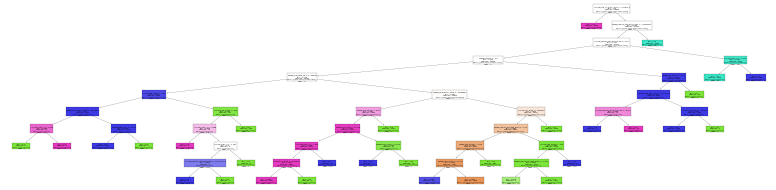

In [729]:
# fn=['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
# cn=['setosa', 'versicolor', 'virginica']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (100,25), dpi=10)
tree.plot_tree(clf, feature_names = features,
               class_names=class_names,
               filled = True,
               fontsize=12);
fig.savefig('tree_10.pdf')

# tree.plot_tree(clf, feature_names=features, fontsize=12)

In [712]:
df_2 = emulab_hdd_merged.copy()
remove_labels = [ 91, 100, 46]
df_2 = remove_labels_in_df(df_2, remove_labels)
df_2 = normalize_df(df_2)
df_2 = grouped_to_5_cat(df_2,161)
target_label = 145
df_2 = df_2[df_2.label_value == target_label]

# y_test = df_2.label_value.loc[2:3]
# X_test = df_2[features].loc[2:3,:]
y_test = df_2.label_value
X_test = df_2[features]
y_pred = clf.predict(X_test)
print(np.round(metrics.f1_score(y_test, y_pred, average='weighted') * 100, 2))

67.31


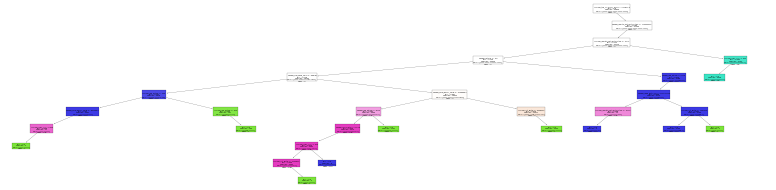

In [713]:


decision_path = clf.decision_path(X_test.iloc[np.where(y_pred!=target_label)])
# print(decision_path)

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (100,25), dpi=10)
class_names = [str(lbl) for lbl in sorted(Counter(train_df.label_value).keys())]
model_tree = tree.plot_tree(clf, feature_names = features,
               class_names=class_names,
               filled = True,
               fontsize=12);

for i in range(0,len(model_tree)):
     if i not in decision_path.indices:
         plt.setp(model_tree[i],visible=False)
fig.savefig('path_10.pdf')
plt.show()


In [728]:
tmp_df = X_test.iloc[np.where(y_pred!=target_label)]
tmp_df
# tmp_df[tmp_df.sender_remote_ost_write_bytes <= 77594624.0]
# tmp_df[tmp_df.receiver_remote_ost_write_bytes <= 2.141]
# tmp_df[(tmp_df.receiver_remote_ost_write_bytes <= 2.141) & (tmp_df.sender_retrans <=0)]
tmp_df[ (tmp_df.sender_read_bytes_io > 182759424.0)&
       (tmp_df.receiver_remote_ost_write_bytes <= 2.141)
       & (tmp_df.sender_retrans >0) & (tmp_df.sender_req_active <= 569.5)]
#        (tmp_df.sender_send_buffer_value <= 459016.0)]
# tmp_df[tmp_df.receiver_write_bytes_io <= 112316416.0]

,sender_seg_out,sender_avg_send_value,sender_read_bytes_io,sender_write_bytes_io,sender_ost_read,sender_ost_write,sender_remote_ost_read_bytes,sender_remote_ost_write_bytes,receiver_write_bytes_io,receiver_ost_write,...,sender_pending_read_pages,sender_read_RPCs_in_flight,sender_send_buffer_value,sender_req_active,receiver_req_active,sender_retrans,sender_cwnd_rate,receiver_tcp_rcv_buffer_max,receiver_read_bytes_io,receiver_ost_read
4209,0.740958,3539.6,193376256,32768,2769276,0,0.779955,0,138469376,1173331,...,7,0,112944.0,140,63,0.000385,33.0,6291456,45830144,0
4210,1.030204,3666.9,575057920,32768,7172511,0,0.980515,0,491200512,4973610,...,8,0,125976.0,312,256,0.000200,44.0,6291456,45830144,0
4211,0.903601,3828.6,742830080,32768,7551875,0,0.980515,0,662777856,4014781,...,2,0,43440.0,275,179,0.000323,39.0,6291456,45834240,0
4212,0.913763,3564.3,927379456,45056,5739580,0,0.980515,0,839315456,4013229,...,2,0,13032.0,254,175,0.000262,36.0,6291456,45834240,0
4213,1.274949,8028.5,1162260480,45056,8119367,0,1.002799,0,1075916800,8776550,...,9,4096,84040.0,421,448,0.000262,70.0,6291456,45834240,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37422,1.050343,7794.8,7625134080,61440,9846824,0,1.047368,0,7528206336,10063481,...,9,5120,0.0,423,435,0.002354,432.0,6291456,46977024,0
37423,1.071698,9056.3,7826460672,61440,9748527,0,1.069653,0,7729532928,9942848,...,9,5120,0.0,423,412,0.001385,541.0,6291456,46977024,0
37424,1.050936,6777.4,8027787264,61440,9971176,0,1.047368,0,7926665216,10200331,...,9,2048,0.0,423,410,0.002777,423.0,6291456,46977024,0
37425,1.048282,6965.2,8229113856,61440,9608326,0,1.047368,0,8127287296,10771068,...,9,3072,436576.0,423,415,0.000246,377.0,6291456,46977024,0


In [605]:
np.where(y_pred!=target_label)
X_test.iloc[np.where(y_pred!=target_label)]
# X_test

,sender_seg_out,sender_avg_send_value,sender_read_bytes_io,sender_write_bytes_io,sender_ost_read,sender_ost_write,sender_remote_ost_read_bytes,sender_remote_ost_write_bytes,receiver_write_bytes_io,receiver_ost_write,...,sender_pending_read_pages,sender_read_RPCs_in_flight,sender_send_buffer_value,sender_req_active,receiver_req_active,sender_retrans,sender_cwnd_rate,receiver_tcp_rcv_buffer_max,receiver_read_bytes_io,receiver_ost_read
6459,0.317185,1511.0,172367872,32768,1735642,0,0.445689,0,97730560,401522,...,0,0,1029528.0,65,21,501.0,18.0,6291456,46850048,0
6460,0.190513,1824.3,214310912,32768,865212,0,0.222844,0,130953216,265742,...,0,0,745720.0,30,13,307.0,20.0,6291456,46850048,0
6461,0.432550,3779.2,298196992,36864,1611072,0,0.423404,0,211382272,814499,...,7,0,1187360.0,108,41,377.0,46.0,6291456,46854144,0
6462,0.404434,3230.2,390471680,36864,2295394,0,0.467973,0,286916608,1194475,...,3,0,1093240.0,53,47,469.0,29.0,6291456,46854144,0
6463,0.152673,93.4,424026112,36864,951116,0,0.222844,0,316358656,211508,...,0,0,1143920.0,20,9,257.0,1.0,6291456,46854144,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28405,1.048713,6152.4,6886932480,77824,10008170,0,1.069653,0,6731284480,10329251,...,9,4096,0.0,432,436,90.0,239.0,6291456,45838336,0
28406,1.070575,5035.8,7088259072,77824,9748129,0,1.047368,0,6928678912,10286946,...,9,5120,0.0,423,410,45.0,303.0,6291456,45838336,0
28407,1.048297,7670.5,7289585664,77824,9784437,0,1.047368,0,7132758016,10323326,...,9,6144,0.0,423,426,45.0,392.0,6291456,45838336,0
28408,1.048674,6866.2,7490912256,77824,9837430,0,1.047368,0,7331069952,8691551,...,9,3072,0.0,423,409,90.0,326.0,6291456,45838336,0


In [603]:
# utah_ssd_merged.loc[utah_ssd_merged['label_value']==0]


12

In [15]:
def grouped_to_5_cat(df, total_possible_labels):
    aggregated_labels = {}
    for i in range(total_possible_labels + 1):
        aggregated_labels[i] = i
    # 0 is normal and is one group itself
    # # group read together
    for i in range(1, 55):
        aggregated_labels.update({i: 1})

    # group write together
    for i in range(55, 109):
        aggregated_labels.update({i: 55})
    # group networks together
    for i in range(109, 145):
        aggregated_labels.update({i: 109})
    # group tcp configs together
    for i in range(145, 157):
        aggregated_labels.update({i: 145})
    # group with networks together
    for i in range(157, 161):
        aggregated_labels.update({i: 109})
    y = [aggregated_labels[int(i)] for i in df[df.columns[len(df.columns) - 1]].values]
    df["label_value"] = y
    return df

In [19]:
df = pd.read_csv(filenames.get('wisconsin_ssd_unmerged')).drop(['time_stamp', 'through_put'], axis=1)
# df = grouped_to_5_cat(df,161)
df.shape
Counter(df.label_value)

Counter({98: 148,
         38: 151,
         31: 137,
         59: 159,
         27: 138,
         141: 163,
         63: 158,
         80: 158,
         123: 139,
         136: 154,
         147: 142,
         13: 154,
         120: 145,
         125: 146,
         24: 139,
         26: 143,
         124: 143,
         9: 163,
         57: 158,
         15: 158,
         47: 143,
         4: 169,
         29: 123,
         114: 155,
         1: 168,
         22: 137,
         73: 142,
         7: 159,
         131: 160,
         122: 139,
         54: 153,
         36: 136,
         83: 137,
         49: 143,
         132: 153,
         121: 146,
         157: 161,
         126: 145,
         39: 152,
         127: 142,
         105: 151,
         128: 146,
         56: 154,
         37: 150,
         154: 157,
         70: 152,
         11: 161,
         52: 155,
         60: 157,
         133: 147,
         103: 138,
         66: 160,
         42: 154,
         35: 139,
         116

In [316]:
t = pd.read_csv(filenames.get('utah_ssd_merged')).drop(['time_stamp', 'through_put'], axis=1)
t[t.label_value == 0].receiver_avg_waittime_md

11117    149
11118    149
11119    149
11120    149
11121    149
        ... 
11293    158
11294    158
11295    158
11296    158
11297    158
Name: receiver_avg_waittime_md, Length: 181, dtype: int64